Q6
The file used for this analysis is as follows.
"C:\Users\Sai\Desktop\Q6\39_Specific_purpose_of_kidnapping_and_abduction.csv"

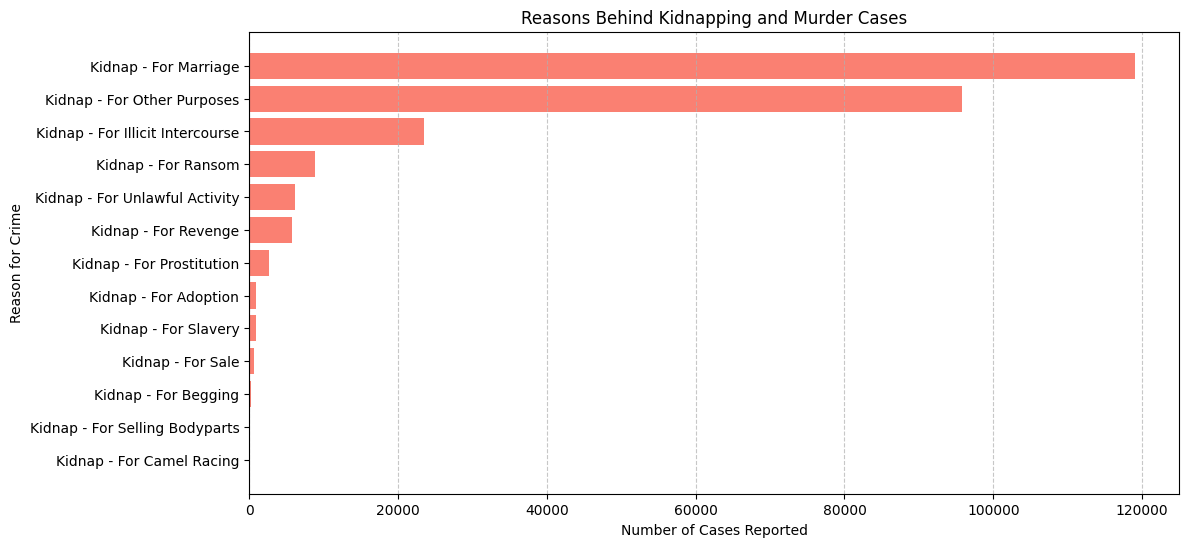

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path =  r"C:\Users\Sai\Desktop\Q6\39_Specific_purpose_of_kidnapping_and_abduction.csv"
df = pd.read_csv(file_path)

df = df[~df["Group_Name"].str.contains("Total", case=False, na=False)]

crime_count_column = None
for col in df.columns:
    if "Cases" in col or "Number" in col: 
        crime_count_column = col
        break

if crime_count_column is None:
    raise KeyError("Could not find the correct column for crime counts. Please check dataset headers.")

crime_reasons = df.groupby("Group_Name")[crime_count_column].sum().reset_index()

crime_reasons = crime_reasons.sort_values(by=crime_count_column, ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(crime_reasons["Group_Name"], crime_reasons[crime_count_column], color='salmon')
plt.xlabel("Number of Cases Reported")
plt.ylabel("Reason for Crime")
plt.title("Reasons Behind Kidnapping and Murder Cases")
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.show()


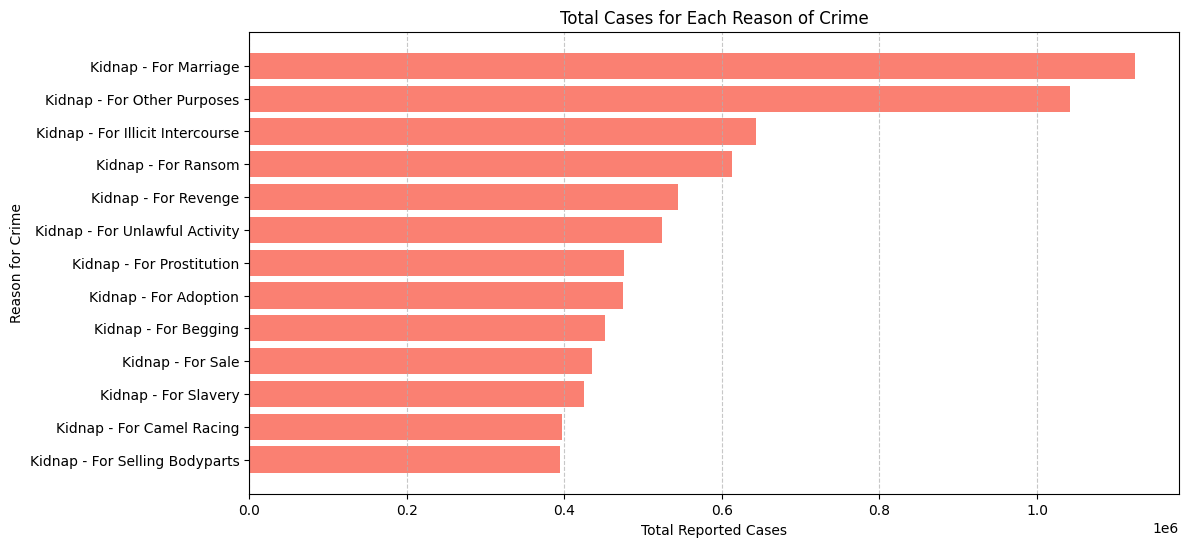

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r"C:\Users\Sai\Desktop\Q6\39_Specific_purpose_of_kidnapping_and_abduction.csv"
df = pd.read_csv(file_path)

df = df[~df["Group_Name"].str.contains("Total", case=False, na=False)]


crime_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

crime_reasons = df.groupby("Group_Name")[crime_columns].sum().reset_index()

crime_reasons["Total_Cases"] = crime_reasons[crime_columns].sum(axis=1)
crime_reasons = crime_reasons.sort_values(by="Total_Cases", ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(crime_reasons["Group_Name"], crime_reasons["Total_Cases"], color='salmon')
plt.xlabel("Total Reported Cases")
plt.ylabel("Reason for Crime")
plt.title("Total Cases for Each Reason of Crime")
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

